<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

In [1]:
### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [52]:
from typing import List
import requests

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    # add your code here
    features = ','.join(features)
    url = "https://archive-api.open-meteo.com/v1/archive/"
    params = {
        'latitude':latitude,
        'longitude':longitude,
        'start_date':start_date,
        'end_date':end_date,
        'daily':features,
        'timezone':'GMT',
    }
    response = requests.get(url=url, params=params)
    data = response.json()
    
    return data

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [53]:
# add your code here
import pandas as pd
latitude = 51.5072
longitude = 0.1276
start_date = "1950-01-01"
end_date = "1954-12-31"
features = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min','precipitation_sum']
data = acquire_data(latitude, longitude, start_date, end_date, features)
data = data.pop('daily')
weather_df = pd.DataFrame(data)
weather_df.columns

Index(['time', 'temperature_2m_mean', 'temperature_2m_max',
       'temperature_2m_min', 'precipitation_sum'],
      dtype='object')

In [71]:
labels = weather_df.columns
x_label = labels[0]
y_labels = labels[1:]
x = weather_df[x_label]
ys = weather_df[y_labels]
x = x.values
ys = [ys[col] for col in ys.columns]
print(x.shape, '\n', len(ys[1]), '\n', len(ys))
print(y_labels)

(1826,) 
 1826 
 4
Index(['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'precipitation_sum'],
      dtype='object')


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


<function matplotlib.pyplot.show(close=None, block=None)>

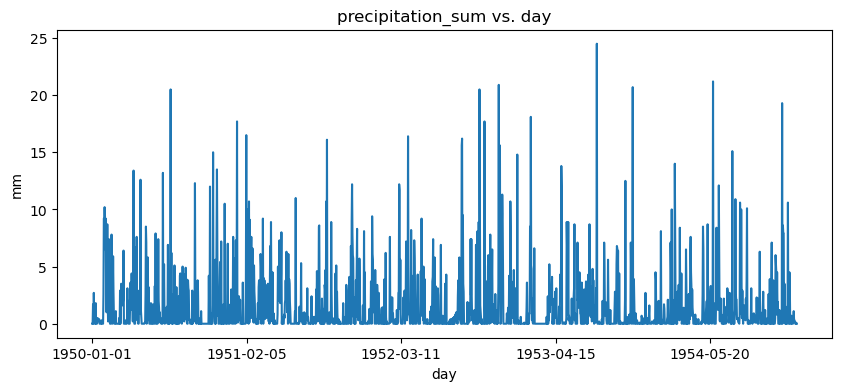

In [55]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    return fig, ax

fig, ax = lineplot(x, ys[-1], f'{y_labels[-1]} vs. day', 'day', 'mm')
fig.set_size_inches(10,4)
plt.show

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

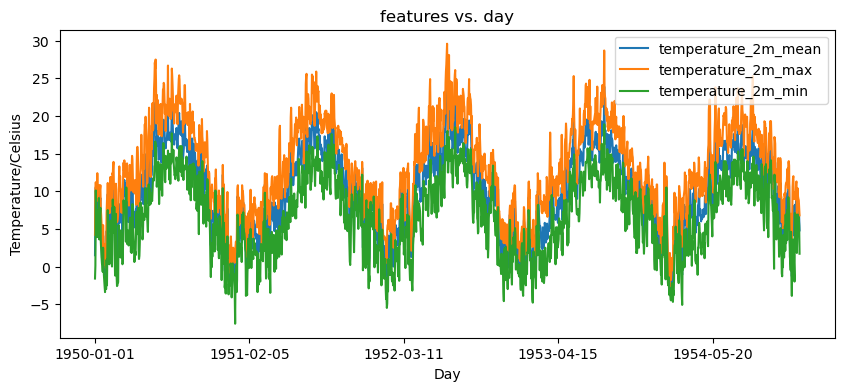

In [56]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.
    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(figsize=(10,4))
    for i, y in enumerate(ys):
        ax.plot(x, y, label=legend[i])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    return fig, ax
fig, ax = lineplots(x, ys[:-1], 'features vs. day', 'Day', 'Temperature/Celsius', y_labels)

plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


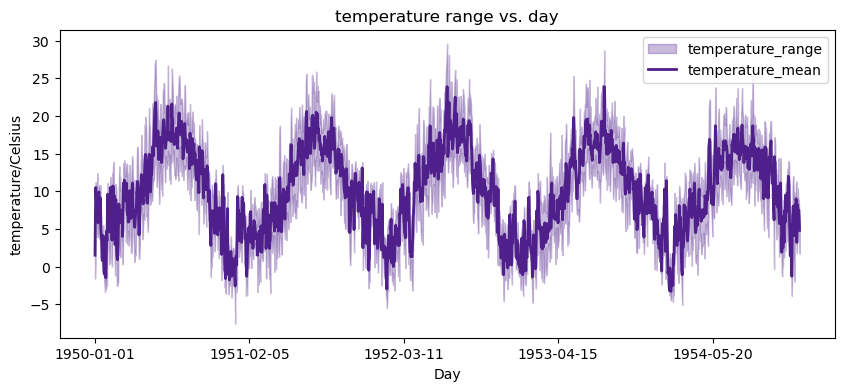

In [57]:
# add your code here
def create_shaded_area(x, _mean, _min, _max, opacity=0.3):
    fig, ax = plt.subplots(figsize=(10,4))
    clr = plt.cm.Purples(0.9)
    ax.fill_between(x, _min, _max, alpha=opacity, edgecolor=clr, facecolor=clr, label='temperature_range')
    ax.plot(x, _mean, color=clr, label='temperature_mean', linewidth=2)
    ax.set_xlabel('Day')
    ax.set_ylabel('temperature/Celsius')
    ax.set_title('temperature range vs. day')
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.legend()
    return fig, ax
fig, ax = create_shaded_area(x, ys[0], ys[2], ys[1])
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

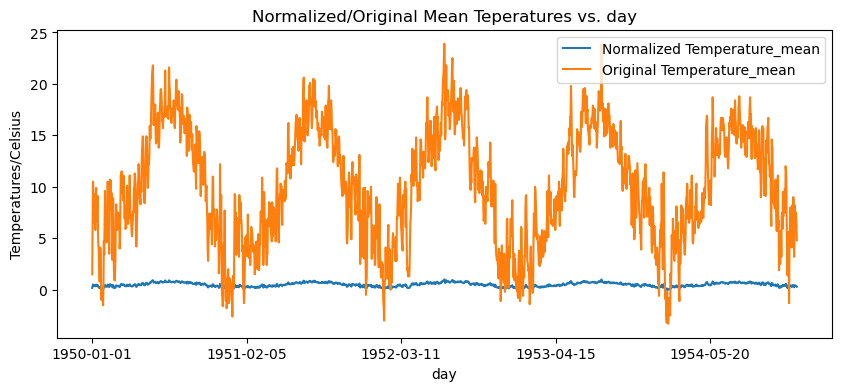

In [58]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    _min = np.min(x)
    _max = np.max(x)
    normalized_x = (x-_min)/(_max-_min)
    return normalized_x
normalized_y_0 = minmax_norm(ys[0])
fig, ax = lineplots(x, [normalized_y_0, ys[0]], 'Normalized/Original Mean Teperatures vs. day',\
                    'day', 'Temperatures/Celsius', ['Normalized Temperature_mean', 'Original Temperature_mean'])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

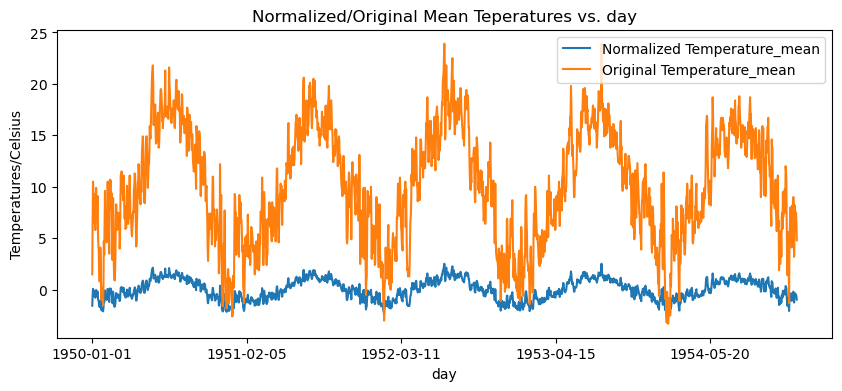

In [59]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x = pd.Series(x)
    mean = x.mean()
    std = x.std()
    normalized_x = (x-mean)/std
    return normalized_x
normalized_y_0 = zscore_norm(ys[0])
fig, ax = lineplots(x, [normalized_y_0, ys[0]], 'Normalized/Original Mean Teperatures vs. day',\
                    'day', 'Temperatures/Celsius', ['Normalized Temperature_mean', 'Original Temperature_mean'])
# ax.plot([0,1900], [3,3])
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [60]:
def zscore_outliers(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    zscore = zscore_norm(x)
    indices = np.where(np.abs(zscore) > threshold)[0]
    return indices
outliers_idx = zscore_outliers(ys[0])
print(outliers_idx)

[  24   28  156  157  189  199  338  346  348  349  354  362  363  393
  754  755  756  910  911  912  913  917  932  933 1058 1108 1133 1319
 1487 1488 1490 1491 1492 1493 1495 1496 1497 1521 1805]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

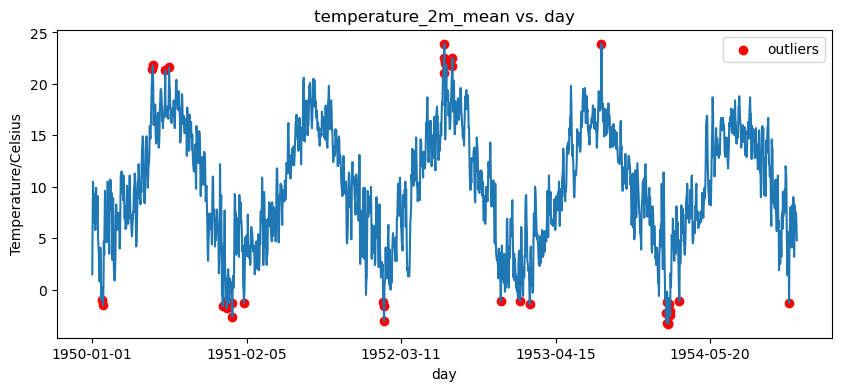

In [61]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    ax.scatter(x[outliers_idx], y[outliers_idx], color='red', label='outliers')
    ax.legend()
    return ax
fig, ax = lineplot(x, ys[0], f'{y_labels[0]} vs. day', 'day', 'Temperature/Celsius')
ax = mark_outliers(ax, x, ys[0], outliers_idx)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [62]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold*iqr
    upper_bound = q3 + threshold*iqr
    outliers_indices = np.where((x < lower_bound) | (x > upper_bound))
    return outliers_indices
outliers_idx_iqr = iqr_detect(ys[0].values)
outliers_idx_iqr

(array([], dtype=int64),)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [63]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    zscore = zscore_norm(x)
    clamped_x = np.where(np.abs(zscore) > threshold, threshold, x)
    return clamped_x
zscore_clamp_x = zscore_clamp(ys[0])

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [75]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=2, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    zscore_outliers_indices = zscore_outliers(y)
    coef = np.polyfit(x, y, deg)
    new_y = y.copy()
    print(zscore_outliers_indices)
    new_y[zscore_outliers_indices] = np.polyval(coef, x[zscore_outliers_indices]).copy()
    return new_y
interp_data = zscore_interp(np.arange(0, len(ys[0])), ys[0].values)

[  24   28  156  157  189  199  338  346  348  349  354  362  363  393
  754  755  756  910  911  912  913  917  932  933 1058 1108 1133 1319
 1487 1488 1490 1491 1492 1493 1495 1496 1497 1521 1805]
